In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time
from PIL import Image
from numpy import asarray
from IPython.display import Image
import ipyplot
#import cv2

In [ ]:
# Section1: Loading images from directories for training and test
train_img_dir ="C:/Users/sheha/Documents/dataset/train"
test_img_dir ="C:/Users/sheha/Documents/dataset/test"

In [ ]:
# ImageDataGenerator class provides a mechanism to load both small and large dataset.
# Instruct ImageDataGenerator to scale to normalize pixel values to range (0, 1)
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [ ]:
#Create a training image iterator that will be loaded in a small batch size. Resize all images to a #standard size.
train_it = datagen.flow_from_directory(train_img_dir, batch_size=8,target_size=(227,227))
# Create a training image iterator that will be loaded in a small batch size. Resize all images to a #standard size.
test_it = datagen.flow_from_directory(test_img_dir, batch_size=8,target_size=(227, 227))

In [ ]:
# Lines 22 through 24 are optional to explore your images.
# Notice, next() function call returns both pixel and labels values as numpy arrays.
train_images, train_labels = train_it.next()
test_images, test_labels = test_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (train_images.shape,train_images.min(), train_images.max()))


In [2]:
classes = ["Ambulance","Bicycle","Bus","Car","Helicopter","Limousine","Motorcycle","Taxi","Truck","Van"]
print(classes)

['Ambulance', 'Bicycle', 'Bus', 'Car', 'Helicopter', 'Limousine', 'Motorcycle', 'Taxi', 'Truck', 'Van']


# AlexNet

In [4]:
#AlexNet
def build_AlexNet():
    model = keras.models.Sequential([
        keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

In [5]:
# Build CNN model
#model = build_cnn()
model = build_AlexNet()
#Compile the model with optimizer and loss function
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# VGG-16

In [6]:
#VGG-16
def build_VGG():
    model = keras.models.Sequential([
        keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding='same', activation='relu'),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
        keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
        keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=4096,activation='relu'),
        keras.layers.Dense(units=4096,activation='relu'),
        keras.layers.Dense(units=10,activation='softmax'),
    ])
    return model

In [7]:
# Build CNN model
#model = build_cnn()
model = build_VGG()
model.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 56, 56, 256)      

In [ ]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)


In [ ]:
model.fit(train_it,
          epochs=50,
          validation_data=test_it,
          validation_freq=1,
          callbacks=[tensorboard_cb])


In [ ]:
model.save('AlexNetFinal.h5')

In [16]:
new_model = tf.keras.models.load_model('AlexNetFinal.h5')


In [17]:
new_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [11]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))


NameError: name 'test_images' is not defined

In [18]:
image = tf.keras.preprocessing.image.load_img("C:/Users/sheha/Documents/punto.jpeg")
image = image.resize((227,227))
print(type(image))
input_arr = keras.preprocessing.image.img_to_array(image)

#input_arr = (input_arr-min(input_arr))/(max(input_arr)-min(input_arr))

input_arr = np.array([input_arr])  # Convert single image to a batch.
#input_arr /= 255.0 #optional might remove i dont know yet



<class 'PIL.Image.Image'>


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


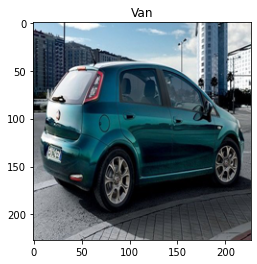

In [19]:
print(new_model.predict(input_arr))
for i in range(10):
    if new_model.predict(input_arr)[0][i] == 1:
        #print(classes[i])
        class_label = classes[i]

plt.imshow(image)
plt.title(classes[i])
plt.show()        
#print(classes[i])

In [ ]:
print(type(new_model.predict(input_arr)))

In [ ]:
print(new_model.predict(input_arr).shape)